In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [156]:
import os

In [161]:
os.listdir('../data/')

['.png',
 'Data Dictionararies.odt',
 'day.csv',
 'Linear Regression Assignment.odt']

In [162]:
df_bike=pd.read_csv('../data/day.csv')

In [163]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Summarization of data

In [164]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [165]:
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [166]:
df_bike.shape

(730, 16)

In [167]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [168]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [169]:
df_bike.describe(include=np.object)

<ipython-input-169-59311054d924>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_bike.describe(include=np.object)


,dteday
count,730
unique,730
top,01-01-2018
freq,1


In [170]:
df_bike.describe(include=[np.number,np.object])

<ipython-input-170-dfc317ff4bb6>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_bike.describe(include=[np.number,np.object])


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [171]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [172]:
df_bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [173]:
df_bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

# EXPLORATORY DATA ANALYSIS

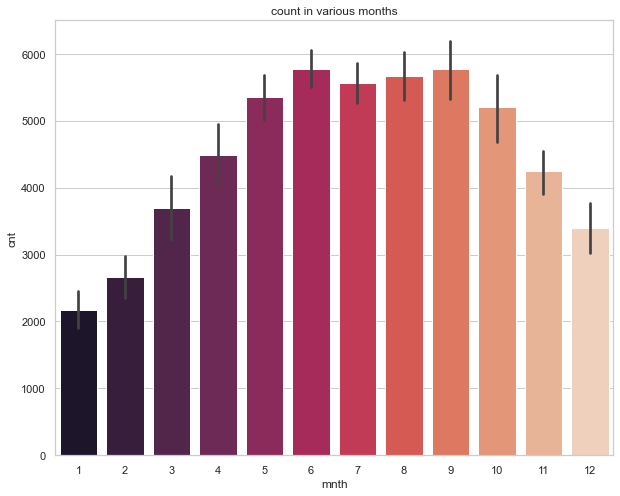

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x="mnth", y="cnt", data=df_bike,palette="rocket")
plt.title('count in various months')
plt.savefig("count_of_bikes_used_in_different_months.jpg")
plt.show() 
# MAXIMUM NUMBER OF BIKES UTILIZED IS IN THE MONTHS OF JUNE AND SEPTEMBER

### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS IN THE MONTHS OF JUNE AND SEPTEMBER

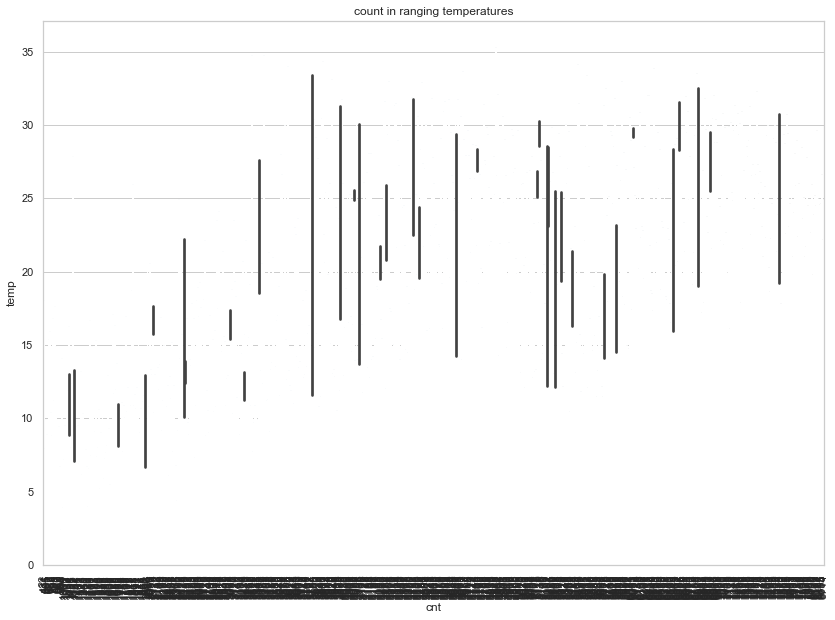

In [72]:
plt.figure(figsize=(14,10))
sns.barplot(x="cnt", y="temp", data=df_bike, palette="Blues_d")
plt.title('count in ranging temperatures')
plt.xticks(rotation=90)
plt.savefig("count_of_bikes_utilized_over_ranging_temperatures.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS IN HIGHER TEMPERATURES

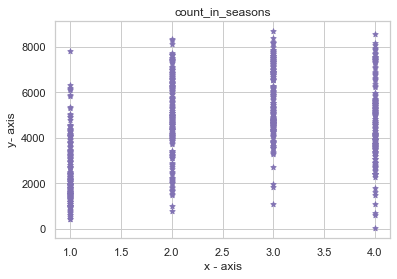

In [115]:
x=df_bike["season"]
y=df_bike["cnt"]

plt.scatter(x,y, color= "m", 
            marker= "*", s=30)

plt.xlabel('x - axis')
plt.ylabel('y- axis')

plt.title('count_in_seasons')
plt.savefig("count_in_seasons.jpg")


plt.show()



### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS IN THE THIRD SEASON

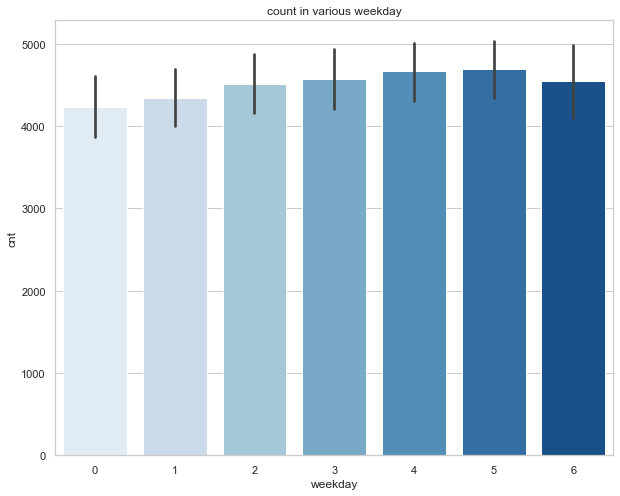

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x="weekday", y="cnt", data=df_bike,palette="Blues")
plt.title('count in various weekday')
plt.savefig("count_of_bikes_used_over_weekdays.jpg")
plt.show() 

### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS ON THE 5TH DAY OF THE WEEK I.E. FRIDAY

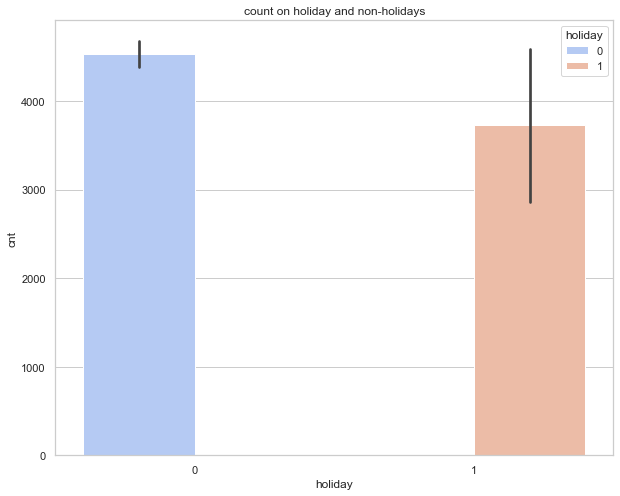

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x="holiday", y="cnt", data=df_bike,palette="coolwarm",hue="holiday")
plt.title('count on holiday and non-holidays')
plt.savefig("count_of_bikes_used_over_holidayandnon-holidays.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS ON HOLIDAYS. ALSO THIS DATA HAS IN ALL 21 HOLIDAYS IN 2 YEARS, HENCE MORE BIKES ON HOLIDAYS IS A LOT IN COMPARED TO NON-HOLIDAYS

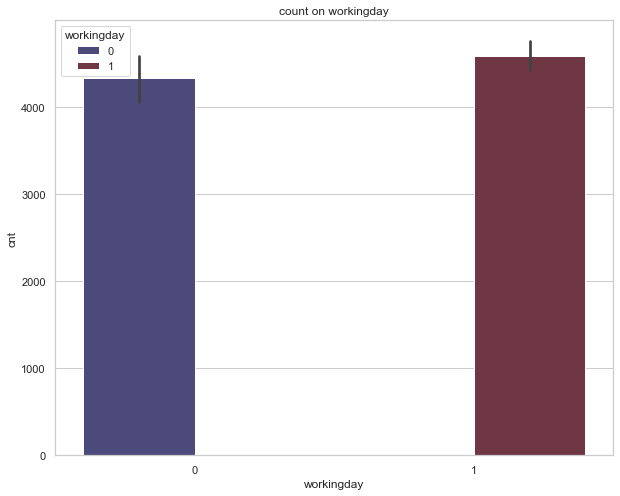

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(x="workingday", y="cnt", data=df_bike,palette="icefire",hue="workingday")
plt.title('count on workingday')
plt.savefig("count_of_bikes_used_over_workingday.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF BIKES UTILIZED IS ON WORKING DAYS

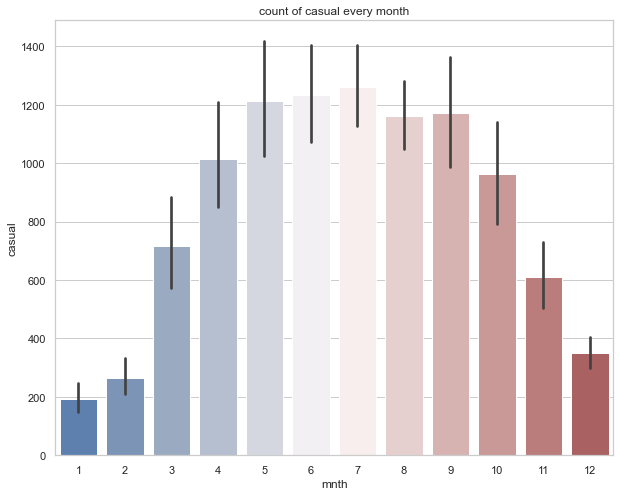

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x="mnth", y="casual", data=df_bike,palette="vlag")
plt.title('count of casual every month')
plt.savefig("count_of_bikes_used_as_casual_every_month.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF CASUAL BIKES UTILIZED IS IN THE MONTH OF JULY

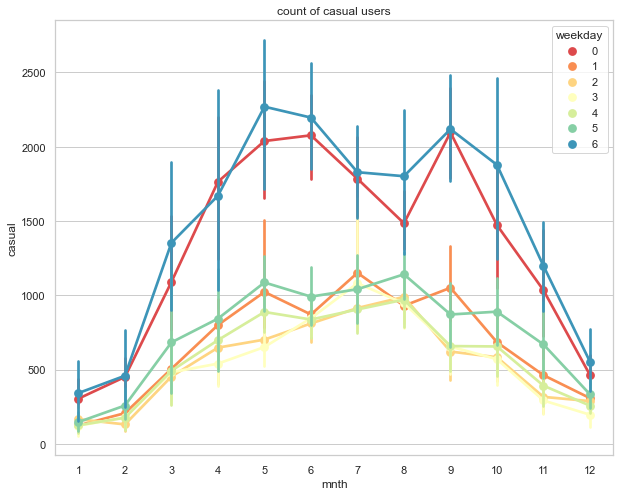

In [104]:
plt.subplots(figsize= (10,8))
sns.pointplot( data=df_bike,x="mnth", y="casual",hue="weekday",palette="Spectral")
plt.title('count of casual users')
plt.savefig("casual users over different days in a month.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF CASUAL BIKES ARE UTILIZED IN THE MONTHS OF MAY AND JUNE, ON WEEKENDS

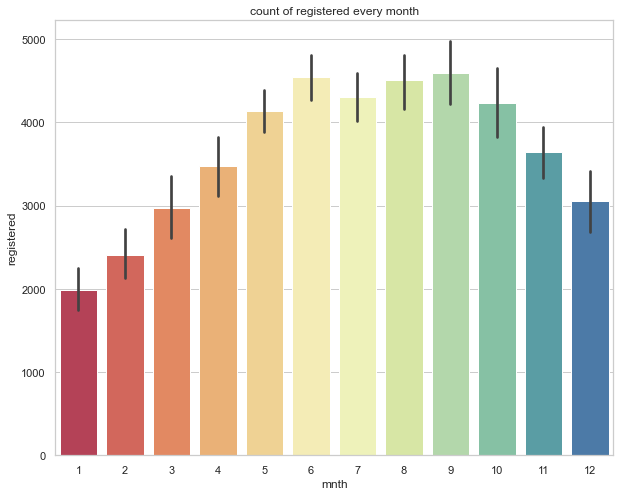

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(x="mnth", y="registered", data=df_bike,palette="Spectral")
plt.title('count of registered every month')
plt.savefig("count_of_bikes_used_as_registered_every_month.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF REGISTERED BIKES UTILIZED IS IN THE MONTH OF SEPTEMBER

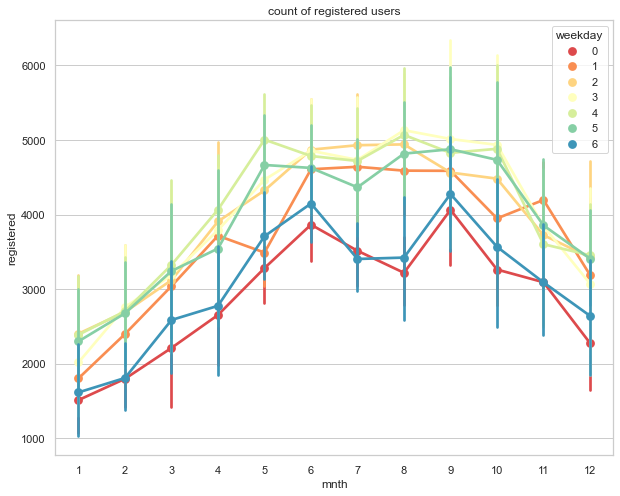

In [105]:
plt.subplots(figsize= (10,8))
sns.pointplot( data=df_bike,x="mnth", y="registered",hue="weekday",palette="Spectral")
plt.title('count of registered users')
plt.savefig("casual users over different days in a month.jpg")
plt.show()

### Inference
>MAXIMUM NUMBER OF REGISTERED BIKES ARE UTILIZED IN THE MONTHS OF SEPTEMBER AND OCTOBER, ON WEEKDAYS. 

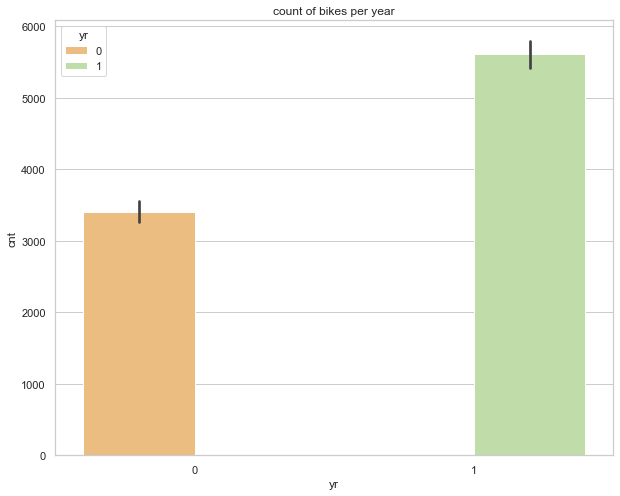

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x="yr", y="cnt", data=df_bike,palette="Spectral",hue='yr')
plt.title('count of bikes per year')
plt.savefig("count_of_bikes_used_as_per_year.jpg")
plt.show()

### Inference
>UTILIZATION OF BIKES GRADUALLY INCREASED IN THE YEAR 2019 BY A LARGE NUMBER

### DATA CLEANING AND DATA PREPARATION
>Data Consistency
>>Handling Missing Data
>>>Treating Outliers
>>>>Scaling Of Data
>>>>>Feature Engineering

In [53]:
# categorical data already treated

In [22]:
# checking data types
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [21]:
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [25]:
# checking missing data
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of bikes over 2 years')

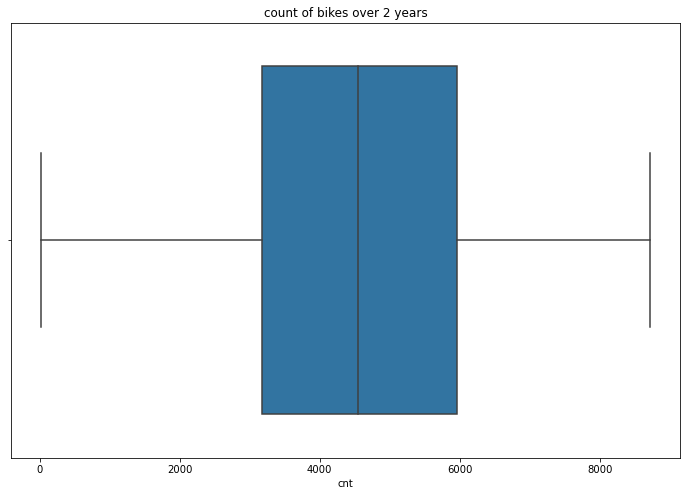

In [57]:
# checking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(df_bike['cnt'])
plt.title('count of bikes over 2 years')

Text(0.5, 1.0, 'count of bikes over 2 years')

<Figure size 864x576 with 0 Axes>

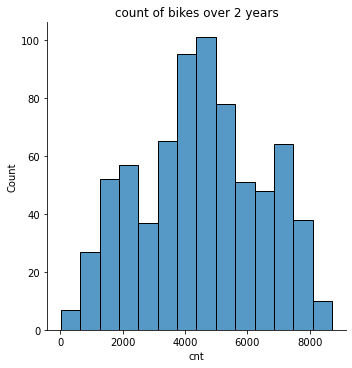

In [58]:
# checking for outliers
plt.figure(figsize=(12,8))
sns.displot(df_bike['cnt'])
plt.title('count of bikes over 2 years')

In [60]:
df = df_bike.copy(deep=True)

In [61]:
df = df.drop_duplicates()

In [62]:
df.dropna(inplace=True)

In [68]:
# feature selection

In [63]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [64]:
predictor_columns=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday','casual', 'registered']
target_columns=['cnt']

In [65]:
x=df[predictor_columns]
y=df[target_columns]

### MODEL TRAINING

In [69]:
# splitting data sets

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40, random_state=30)

In [138]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((438, 8), (292, 8), (438, 1), (292, 1))

In [139]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [140]:
model=reg.fit(x_train,y_train)

In [141]:
model.coef_

array([[ 5.41331848e-13,  1.53964737e-12, -9.56381016e-14,
         2.40470076e-13,  3.49519977e-14, -6.71913133e-13,
         1.00000000e+00,  1.00000000e+00]])

In [142]:
model.intercept_

array([-2.72848411e-12])

In [143]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [144]:
# evaluate the model

In [145]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train, y_train_pred)
print("MAE_train_value:",mae)

mae=mean_absolute_error(y_test, y_test_pred)
print("MAE_test_value:",mae)

MAE_train_value: 1.328763583182056e-12
MAE_test_value: 1.2437417914441863e-12


In [146]:
# mean square error
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_train, y_train_pred)
print("MSE_train value:",mse)

mse= mean_squared_error(y_test, y_test_pred)
print("MSE_test_value:",mse)

MSE_train value: 2.6385333129628562e-24
MSE_test_value: 2.3370795771593e-24


In [149]:
# Root mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print("RMSE_train_value:",rmse)



mse=mean_squared_error(y_test, y_test_pred)
rmse=np.sqrt(mse)
print("RMSE_test_value",rmse)

RMSE_train_value: 1.6243562764870446e-12
RMSE_test_value 1.5287509859880058e-12


In [150]:
#R2 
from sklearn.metrics import r2_score
R2=r2_score(y_train,y_train_pred)
print("R2_train_value:",R2)

R2=r2_score(y_test,y_test_pred)
print("R2_test_value:",R2)

R2_train_value: 1.0
R2_test_value: 1.0


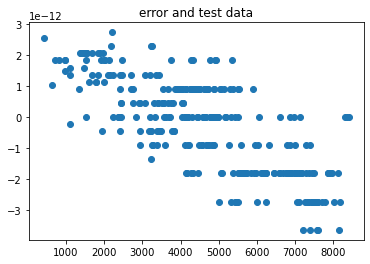

In [152]:
error=y_test-y_test_pred
error
plt.scatter(y_test,error)
#plt.plot(y_test,error)
plt.title('error and test data')
plt.savefig("error and test.jpg")
plt.show()

In [154]:
import joblib
joblib.dump(model,"BikeSharing_Model.joblib")

['BikeSharing_Model.joblib']